In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

In [5]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [6]:
#2.5
#vis_data.state.value_counts().index[0]
result=vis_data['state'].fillna(vis_data.state.value_counts().index[0])
result

0         IL
1         MI
2         MI
3         MI
4         MI
          ..
250301    MI
250302    MI
250303    MI
250304    MI
250305    MI
Name: state, Length: 250306, dtype: object

In [7]:
#2.6
data.dropna()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30462,30467,56,51.0,19.0,1,2,0,0,4,6,...,5,0.620661,0.414927,0.566309,0.680210,0.143626,5.363124,9.080098,10.514468,10262010
30464,30469,44,27.0,7.0,4,4,0,0,10,3,...,9,0.679841,0.132645,0.349899,1.972527,0.139814,3.762408,11.118577,12.599292,7400000
30465,30470,86,59.0,3.0,4,4,1,2,29,16,...,23,0.781217,0.276256,0.362681,1.036452,0.271861,13.100989,1.874868,3.269284,25000000
30467,30472,64,32.0,5.0,6,8,0,1,11,1,...,4,2.047312,0.203020,0.130667,1.772506,0.227547,2.327138,12.872535,13.622569,13500000


In [8]:
#2.8
scaler = StandardScaler()

a=vis_data['balance_due'].values
#np.reshape(a,(250306,1))
scaler.fit_transform(np.reshape(a,(250306,1))).min()

-13.147334652567258

In [9]:
#2.10
a=np.sqrt(vis_data['balance_due'][vis_data.balance_due>0])
a.median()-a.mean()

0.4525960609393067

In [10]:

#'Lefortovo''Basmannoe''Bogorodskoe'Perovo

b=data[(data.sub_area=='Perovo') | (data.sub_area=='Lefortovo') | (data.sub_area=='Basmannoe')
             | (data.sub_area=='Bogorodskoe')]
ax=sns.boxplot(x='sub_area', y='price_doc', data=b)

AttributeError: 'DataFrame' object has no attribute 'sub_area'

In [10]:
#2.12
pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(vis_data[['balance_due', 'payment_amount']])
poly_features
#poly_features.shape
np.mean(poly_features,axis=0).argmax()


6

In [11]:
datetime_vals = pd.to_datetime(vis_data.ticket_issued_date.dropna())
(datetime_vals.dt.weekday>4).sum()

1620

In [12]:
data.ecology.unique()
ecology_dict={'excellent':4,'good':3,'satisfactory':2,'poor':1,'no data':0}
data.ecology = data.ecology.replace(to_replace=ecology_dict)
data.ecology.mean()

1.7282483836030063

In [13]:
pd.get_dummies(data.sub_area)


,Ajeroport,Akademicheskoe,Alekseevskoe,Altuf'evskoe,Arbat,Babushkinskoe,Basmannoe,Begovoe,Beskudnikovskoe,Bibirevo,...,Vnukovo,Vojkovskoe,Vostochnoe,Vostochnoe Degunino,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


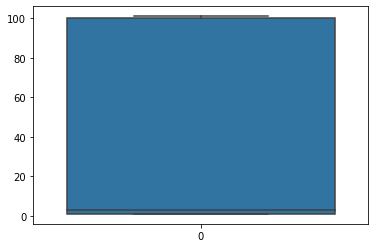

In [2]:
l=[1, 39, 2, 1, 101, 2, 1, 100, 1, 3, 101, 1, 3, 100, 101, 100, 100]
ax=sns.boxplot(data=l)

In [4]:
balance=vis_data.balance_due.dropna()
balance

0         305.0
1          75.0
2           0.0
3           0.0
4           0.0
          ...  
250301      0.0
250302      0.0
250303      0.0
250304      0.0
250305      0.0
Name: balance_due, Length: 250306, dtype: float64

In [7]:
q1,q3=np.percentile(balance,[25,75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
print(lower_bound, upper_bound )

-457.5 762.5


In [11]:
new=balance[((balance<=upper_bound) & (balance>=lower_bound))]
np.max(new)-np.min(new)

1201.3

In [24]:
t=pd.DataFrame({'a':[2],'b':[3],'c':[5]})
pf = PolynomialFeatures(2)
display(pf.fit_transform(t[['a', 'b','c']]))

array([[ 1.,  2.,  3.,  5.,  4.,  6., 10.,  9., 15., 25.]])